In [16]:
tmp = pd.read_csv('./data/nwt_hrly_met_data_20160527/data/c1_hrly_met_data_master_QC_infill.csv')
tmp.index = pd.DatetimeIndex(tmp.datetime)

c1 = pd.DataFrame(columns=['P'])
c1.P = tmp.ppt_h.resample('D').mean() # precip

#c1.P *= 1.85 # multiply P from C1 to get D1 p

In [17]:
dat = pd.read_csv('./data/nwt_hrly_met_data_20160527/data/sdl_hrly_met_data_all_NOQC.csv')
dat.index = pd.DatetimeIndex(dat.datetime)

In [18]:
dat.index.min()

Timestamp('1990-01-01 01:00:00')

In [19]:
dat.index.max()

Timestamp('2014-01-01 00:00:00')

In [3]:
dat.loc[dat.temp>25,'temp'] = np.NaN

In [4]:
out = pd.DataFrame(columns=['Tmin','Tmax','Tave','wind','P'])

out.Tmin = dat.temp.resample('D').min()
out.Tmax = dat.temp.resample('D').max()
out.Tave = dat.temp.resample('D').mean()
out.wind = dat.wind_spd_scalar.resample('D').mean() # wind at 10 m

In [5]:
out = out['1995-10-1':]

In [6]:
out['P'] = c1['1995-10-1':].P
out['rain_duration'] = (out.P*0.6890) + 1.0826 # from CRN hourly rain duration computation
out.P /= 1000. # mm > m

In [7]:
out.loc[out.P == 0.,'rain_duration'] = 0.
out.loc[out.rain_duration>24,'rain_duration'] = 24.

In [8]:
out.Tmin.interpolate(inplace=True)
out.Tmax.interpolate(inplace=True)
out.Tave.interpolate(inplace=True)
out.wind.interpolate(inplace=True)
out.loc[np.isnan(out.P)==True,'P'] = 0.

In [9]:
header = '%s %s %s'%(out.index.min().year,out.index.min().month,out.index.min().day)
np.savetxt('/RHESSys/Como/clim/d1.rain',out.P,comments='',header=header,fmt='%10.8f')
np.savetxt('/RHESSys/Como/clim/d1.tmin',out.Tmin,comments='',header=header,fmt='%10.8f')
np.savetxt('/RHESSys/Como/clim/d1.tmax',out.Tmax,comments='',header=header,fmt='%10.8f')
np.savetxt('/RHESSys/Como/clim/d1.tavg',out.Tave,comments='',header=header,fmt='%10.8f')
np.savetxt('/RHESSys/Como/clim/d1.daytime_rain_duration',out.rain_duration,comments='',header=header,fmt='%10.8f')
np.savetxt('/RHESSys/Como/clim/d1.wind',out.wind,comments='',header=header,fmt='%10.8f')

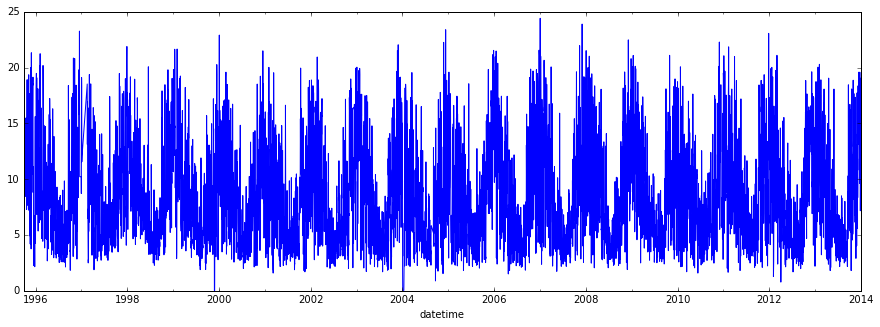

In [10]:
out.wind.plot(figsize=(15,5))

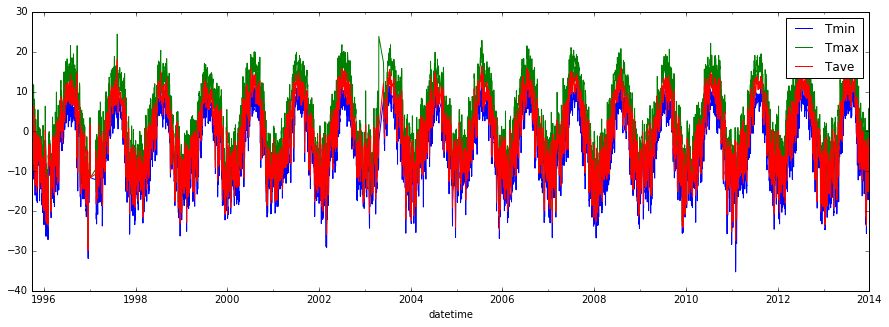

In [11]:
out.Tmin.plot(figsize=(15,5))
out.Tmax.plot()
out.Tave.plot()
plt.legend()

(13787, 14882)

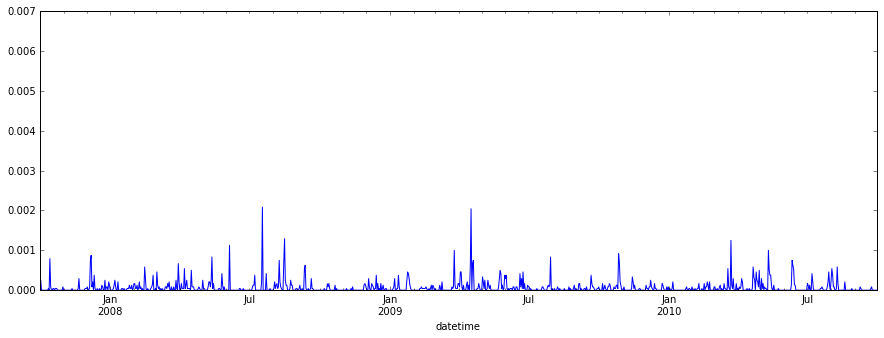

In [12]:
out.P.plot(kind='line',figsize=(15,5));
plt.xlim('2007-10-01','2010-09-30')

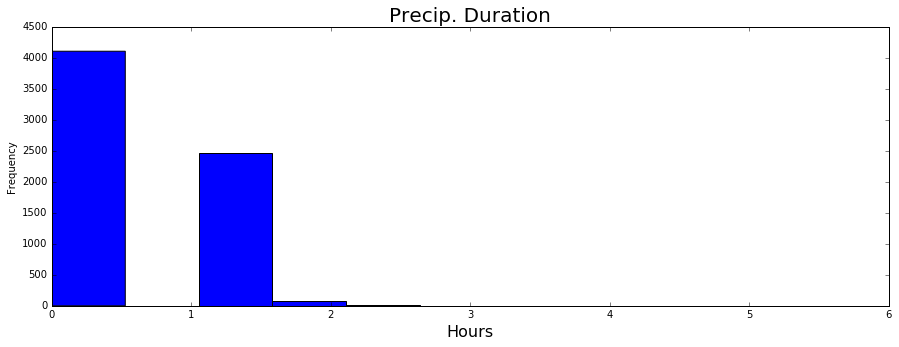

In [13]:
out.rain_duration.plot(kind='hist',figsize=(15,5))
plt.title('Precip. Duration',fontsize=20)
plt.xlabel('Hours', fontsize=16)

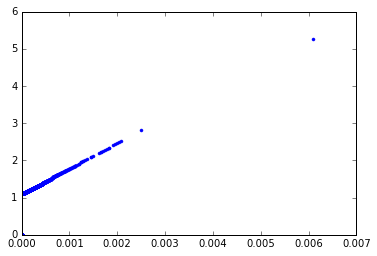

In [14]:
plt.plot(out.P,out.rain_duration,'.')

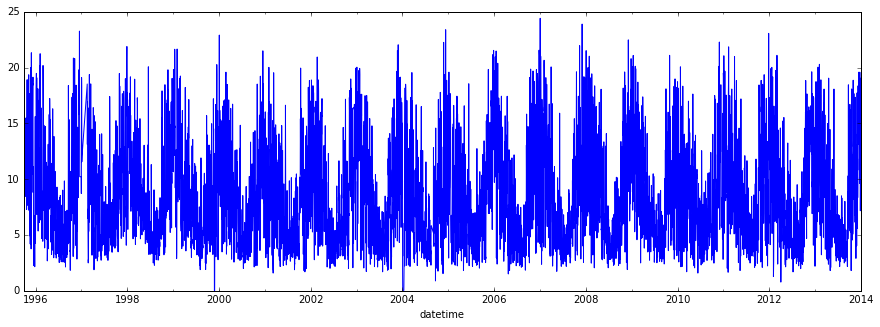

In [15]:
out.wind.plot(figsize=(15,5))